In [1]:
import pandas as pd

Based on Q-Chat score provided by the ASD Test app I am trying to build a predictive model on toddlers to predict probabilty of ASD traits .

We will be working on a dataset on toddlers to build an insight on ASD

In [2]:
df = pd.read_csv("data/data on toddlers.csv")

In [3]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [4]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
df.shape

(1054, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [7]:
df.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638


In [8]:
df.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

In [9]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


We can see that the Age_Mons (age of Moms) has a range of 12 yrs to 36 yrs. The QChat-10 score has a range of 0-10 , the mean is 5(approx) with a standard deviation of 3(approx).

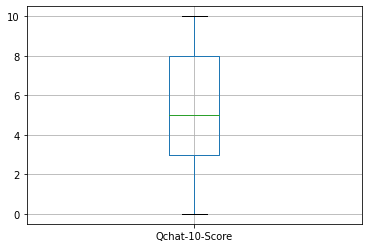

In [10]:
# To visualize the Qchat-10 scores range
boxplot = df.boxplot(column=['Qchat-10-Score'])

We can see here that the mean value of Qchat- 10 score is 5(approx). The 25 percentile is 3 and the 75 percentile is 8. 

In [11]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Class/ASD Traits ', ylabel='count'>

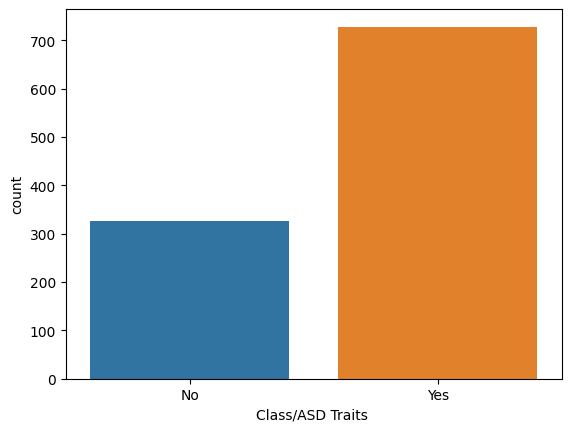

In [13]:
# To visualize the Class/ASD Traits
sns.countplot(x='Class/ASD Traits ' , data=df)

In [14]:
sns.set_style('whitegrid')
data1= df[df['Class/ASD Traits ']=='Yes']


print("Toddlers:",len(data1)/len(df) * 100)

Toddlers: 69.07020872865274


Around 1% of the population has ASD, but for this sample we get 69% Toddlers of the data with postive ASD.

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

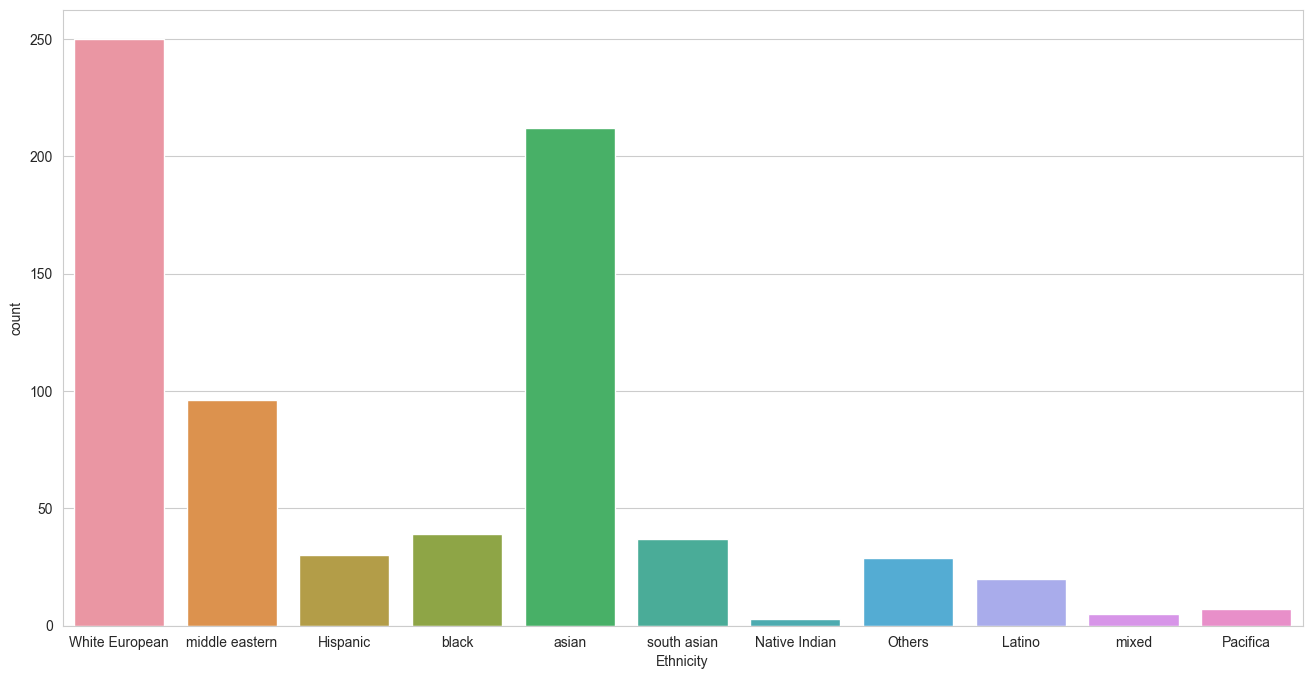

In [15]:
# To visualize the ethnicity of the toddlers with positive ASD
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = data1)

According to our data the toddlers of White European ethnicity is the most affected followed by Asian and Middle Eastern.There may also be a lack of data from other parts of the world we see this huge variation. This factor could become a more accountable if we have similar count of data from other parts of the world. 

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

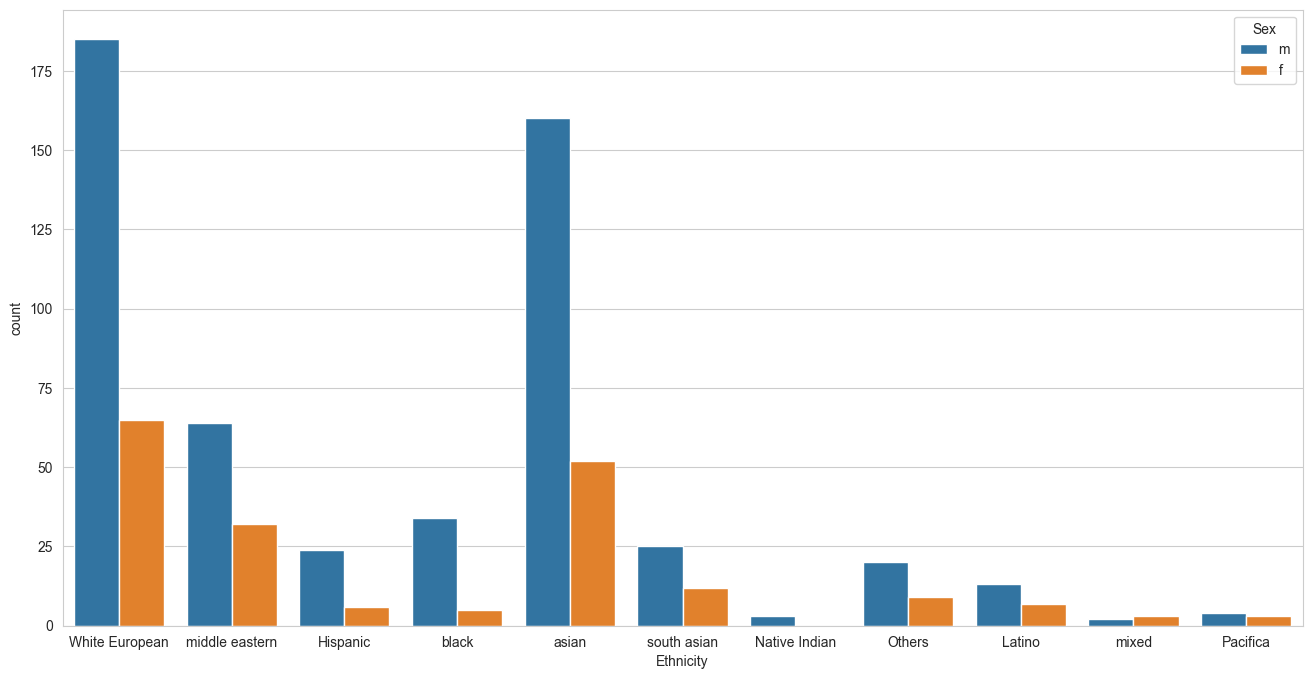

In [16]:
# To visualize the gender based on the ethnicity of toddlers with positive ASD
plt.figure(figsize = (16,8))
sns.countplot(x='Ethnicity',hue='Sex',data=data1)
# plt.xticks(rotation=90)

We see that the male population is more affected than the female population in case of most ethnicities.

<AxesSubplot:ylabel='Qchat-10-Score'>

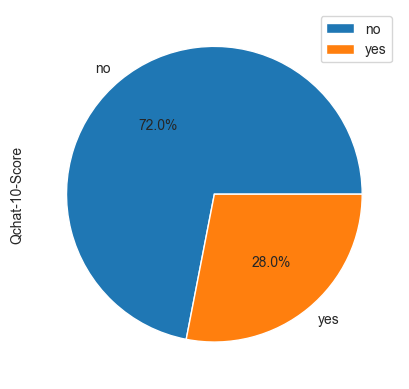

In [17]:
# To visualize the Jaundice born child
df.groupby(['Jaundice']).sum().plot(kind='pie',y='Qchat-10-Score',autopct='%1.1f%%')

<AxesSubplot:ylabel='Qchat-10-Score'>

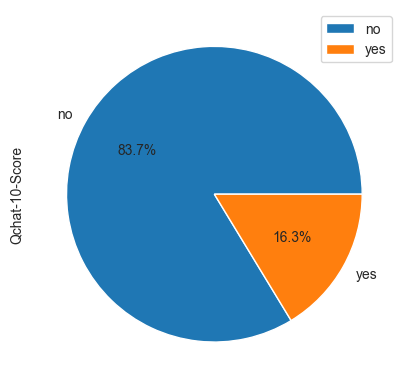

In [18]:
# To visualize the toddlers with Family members with ASD
df.groupby(['Family_mem_with_ASD']).sum().plot(kind='pie', y='Qchat-10-Score',autopct='%1.1f%%')

Jaundice and Family member with ASD has a very lower ratio in dataset we took .

<AxesSubplot:xlabel='Who completed the test', ylabel='count'>

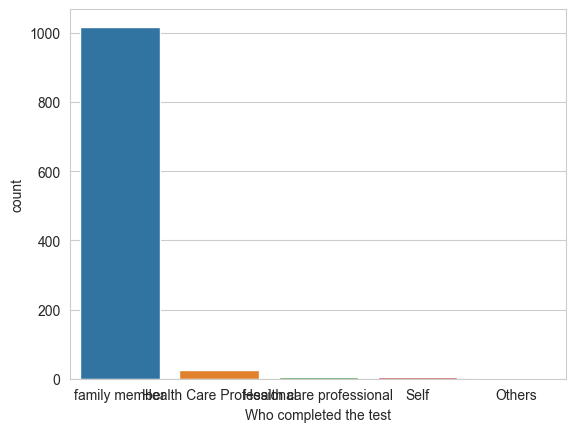

In [19]:
# To visualize who completed the test
sns.countplot(x='Who completed the test' , data=df)

Due to the developing awareness on ASD we see that the family memebers/parents are taking up the test via the ASD app in case of toddlers

<AxesSubplot:xlabel='Age_Mons'>

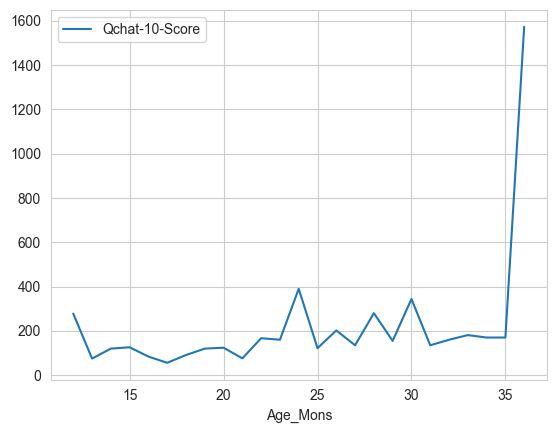

In [20]:
# To visualize the age of moms during their child birth
df.groupby(['Age_Mons']).sum().plot(kind='line',y='Qchat-10-Score')

In our dataset the age of moms has a wide range from 12 yrs to 36 years. We are not able to draw a strong inference from it. 

In [21]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


The 25 quartile of QChat Score is 3.So now we are trying to build a dataset with toddlers of Qchat 10 score higher than or equal to 3.

In [22]:
import numpy as np

In [23]:
df['Probable_case'] = np.where(df['Qchat-10-Score']>=3, 'yes','no')

In [24]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Probable_case
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No,yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes,yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes,yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes,yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes,yes


In [25]:
df.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
Probable_case             object
dtype: object

In [26]:
probable1_df = df[df.Probable_case == 'yes']

In [27]:
probable1_df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Probable_case
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No,yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes,yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes,yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes,yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1048,1,1,0,0,1,1,1,0,0,0,30,5,f,White European,no,no,family member,Yes,yes
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes,yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes,yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No,yes


We got a new dataframe probable1 based on the cases where the QChat-10 score >= 3

In [28]:
probable1_df.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
Case_No,1.000000,-0.024344,-0.056593,0.058462,0.025523,0.005128,-0.031636,0.020764,-0.011831,0.015466,-0.046870,-0.031323,-0.010237
A1,-0.024344,1.000000,0.372362,0.065775,0.026729,0.042858,0.171909,0.109060,0.040369,0.116963,0.083659,-0.013192,0.437406
A2,-0.056593,0.372362,1.000000,0.078077,0.113033,0.081438,0.151274,0.115730,0.140712,0.105528,0.116456,-0.028970,0.502733
A3,0.058462,0.065775,0.078077,1.000000,0.464079,0.207363,0.134223,0.008939,0.136778,0.249891,-0.057809,-0.203504,0.513027
A4,0.025523,0.026729,0.113033,0.464079,1.000000,0.157986,0.156645,0.099175,0.105316,0.273586,-0.047240,-0.209700,0.519342
A5,0.005128,0.042858,0.081438,0.207363,0.157986,1.000000,0.218127,0.106881,0.181293,0.263147,-0.047776,-0.054399,0.482917
A6,-0.031636,0.171909,0.151274,0.134223,0.156645,0.218127,1.000000,0.121619,0.125206,0.232533,-0.013090,-0.015990,0.492053
A7,0.020764,0.109060,0.115730,0.008939,0.099175,0.106881,0.121619,1.000000,0.090902,0.135447,0.123210,-0.046941,0.387546
A8,-0.011831,0.040369,0.140712,0.136778,0.105316,0.181293,0.125206,0.090902,1.000000,0.153539,0.058308,0.014285,0.453444
A9,0.015466,0.116963,0.105528,0.249891,0.273586,0.263147,0.232533,0.135447,0.153539,1.000000,-0.068448,-0.131236,0.540800


There are 10 questionson the ASDapp. Qchat score has almost a positive correlation with the questions A1- A10. it has the highest correlation with A4,A3, A9 which are:


Would you describe your child’s first words as:Very typical/Quite typical/Slightly unusual/Very unusual/My child doesn’t speak


Does your child point to indicate that s/he wants something? 

Does your child show simple gestures?(eg. wave goodbye)

From this we can infer that a child who is not able to express himself through words or actions and doesn't show simple gestures like waving "goodbye" are probably referred to be ASD positive. Parents must be very carefull in observing these character traits and shoud refer their kids for multi disciplinary assessment.

We can also see that the Age of Moms has mostly negative correlations with Qchat questions and Score. So we can infer that the Age of moms is not a factor in having positive ASD

<AxesSubplot:title={'center':'Qchat-10-Score'}, ylabel='Frequency'>

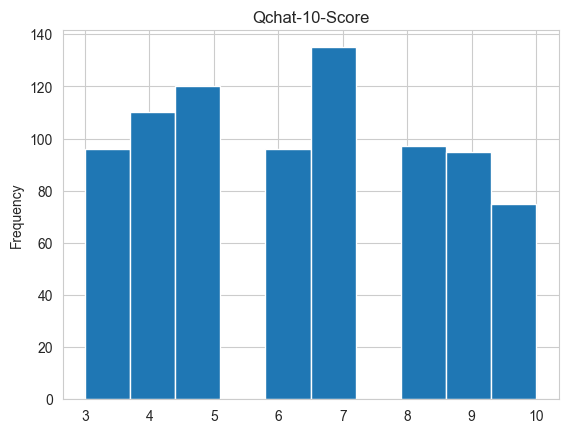

In [29]:
# To visualize the Qchat-10-Score distribution
probable1_df["Qchat-10-Score"].plot(kind = "hist",title ="Qchat-10-Score" )

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

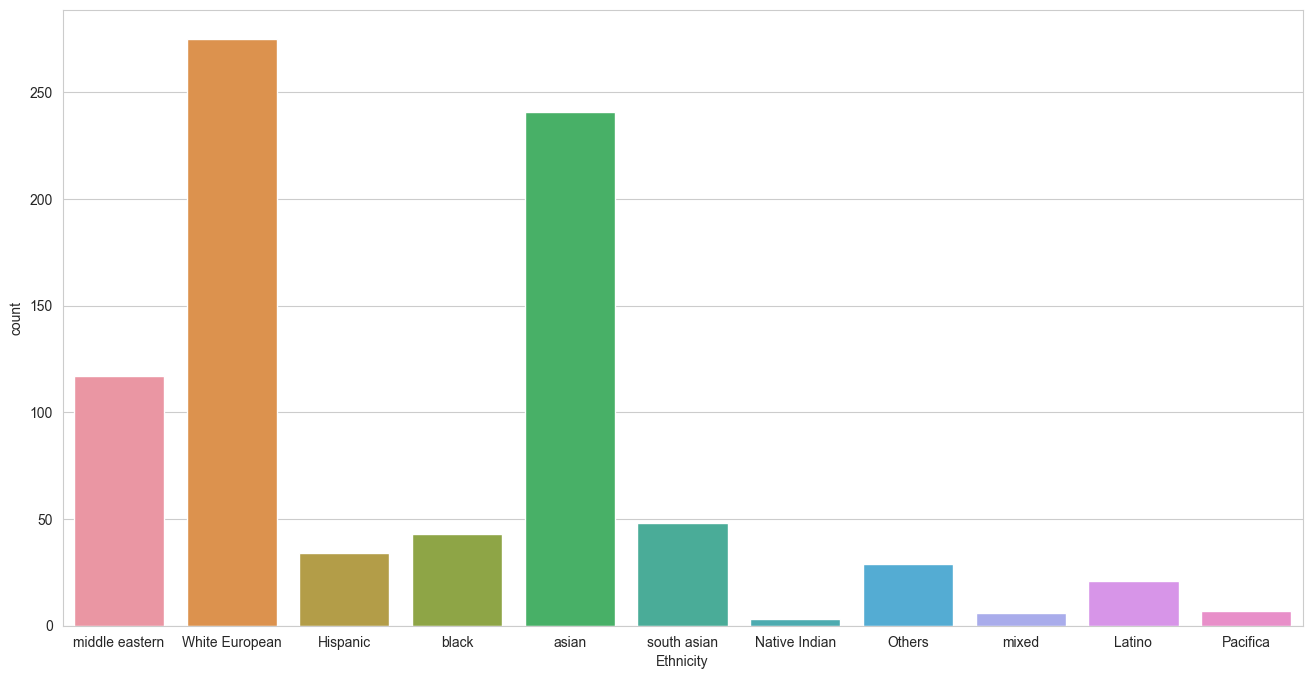

In [30]:
# To visualize ethnicity
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = probable1_df)

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

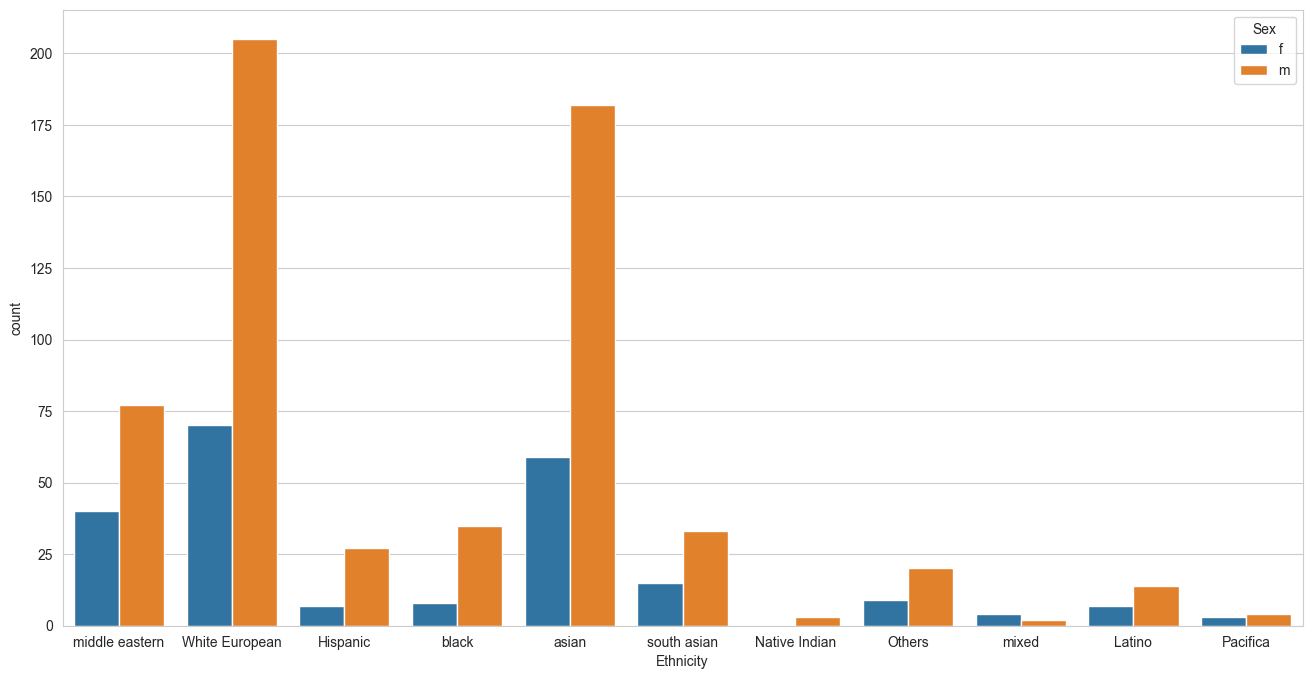

In [31]:
# To visualize gender on ethnicity
plt.figure(figsize = (16,8))
sns.countplot(x='Ethnicity',hue='Sex',data=probable1_df)

<AxesSubplot:ylabel='Qchat-10-Score'>

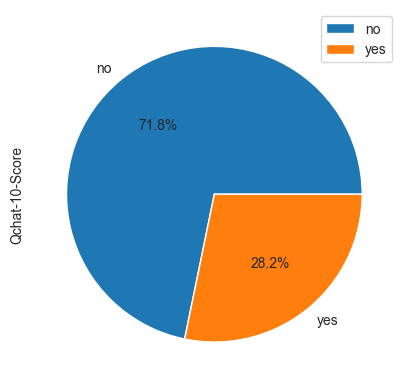

In [32]:
# To visualize Jaundice
probable1_df.groupby(['Jaundice']).sum().plot(kind='pie',y='Qchat-10-Score',autopct='%1.1f%%')

The factors as Ethnicity, Sex, Jaundice infer same result as the previous dataset.

Now we are trying to align our dataset with the Adults dataset . We will be renaming some attributes and as age is not provided in our Toddlers dataset we will be providing a age-group attribute whose value will be 'Toddlers'

In [33]:
probable1_df.rename(columns={'Sex':'Gender'})

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Probable_case
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No,yes
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes,yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes,yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes,yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,1048,1,1,0,0,1,1,1,0,0,0,30,5,f,White European,no,no,family member,Yes,yes
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes,yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes,yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No,yes


In [34]:

probable1_df['age-group'] = 'Toddlers'

/var/folders/3x/9l24p0_15v7f2c1jgn7mjslc0000gp/T/ipykernel_35203/2013840519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probable1_df['age-group'] = 'Toddlers'


In [35]:
probable1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 1053
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 824 non-null    int64 
 1   A1                      824 non-null    int64 
 2   A2                      824 non-null    int64 
 3   A3                      824 non-null    int64 
 4   A4                      824 non-null    int64 
 5   A5                      824 non-null    int64 
 6   A6                      824 non-null    int64 
 7   A7                      824 non-null    int64 
 8   A8                      824 non-null    int64 
 9   A9                      824 non-null    int64 
 10  A10                     824 non-null    int64 
 11  Age_Mons                824 non-null    int64 
 12  Qchat-10-Score          824 non-null    int64 
 13  Sex                     824 non-null    object
 14  Ethnicity               824 non-null    object
 15  Jaund

In [36]:
probable1_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Probable_case,age-group
0,1,0,0,0,0,0,0,1,1,0,...,28,3,f,middle eastern,yes,no,family member,No,yes,Toddlers
1,2,1,1,0,0,0,1,1,0,0,...,36,4,m,White European,yes,no,family member,Yes,yes,Toddlers
2,3,1,0,0,0,0,0,1,1,0,...,36,4,m,middle eastern,yes,no,family member,Yes,yes,Toddlers
3,4,1,1,1,1,1,1,1,1,1,...,24,10,m,Hispanic,no,no,family member,Yes,yes,Toddlers
4,5,1,1,0,1,1,1,1,1,1,...,20,9,f,White European,no,yes,family member,Yes,yes,Toddlers


In [37]:
probable1_df.rename(columns={'Sex':'Gender'},inplace=True)

/var/folders/3x/9l24p0_15v7f2c1jgn7mjslc0000gp/T/ipykernel_35203/1241240564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probable1_df.rename(columns={'Sex':'Gender'},inplace=True)


In [38]:
probable1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 1053
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 824 non-null    int64 
 1   A1                      824 non-null    int64 
 2   A2                      824 non-null    int64 
 3   A3                      824 non-null    int64 
 4   A4                      824 non-null    int64 
 5   A5                      824 non-null    int64 
 6   A6                      824 non-null    int64 
 7   A7                      824 non-null    int64 
 8   A8                      824 non-null    int64 
 9   A9                      824 non-null    int64 
 10  A10                     824 non-null    int64 
 11  Age_Mons                824 non-null    int64 
 12  Qchat-10-Score          824 non-null    int64 
 13  Gender                  824 non-null    object
 14  Ethnicity               824 non-null    object
 15  Jaund

In [39]:
probable1_df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Age_Mons,Qchat-10-Score,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Probable_case,age-group
0,1,0,0,0,0,0,0,1,1,0,...,28,3,f,middle eastern,yes,no,family member,No,yes,Toddlers
1,2,1,1,0,0,0,1,1,0,0,...,36,4,m,White European,yes,no,family member,Yes,yes,Toddlers
2,3,1,0,0,0,0,0,1,1,0,...,36,4,m,middle eastern,yes,no,family member,Yes,yes,Toddlers
3,4,1,1,1,1,1,1,1,1,1,...,24,10,m,Hispanic,no,no,family member,Yes,yes,Toddlers
4,5,1,1,0,1,1,1,1,1,1,...,20,9,f,White European,no,yes,family member,Yes,yes,Toddlers


In [40]:
probable1_df.to_csv('Study on toddlers.csv')

We have turned our probable1_df dataframe into a csv and we will be merging it with Adults dataset to perform a combined analysis on all age groups